In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas as pd
import seaborn as sns
import datetime, warnings, scipy 
from sklearn import metrics, linear_model


# Visualizations

In [2]:
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
#flights_train = pd.read_csv("flights_train.csv")
#flights_test = pd.read_csv("flights_test.csv")

In [3]:
flights_train = pd.read_csv("out.csv")
flights_test = pd.read_csv("test_out.csv")

In [4]:
new_data = flights_train

In [6]:
flights_train.head()

,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,ARRIVAL_DELAY,SCHEDULED_DEPARTURE_TIME,DELAYED_DEPARTURE,TIME_OF_DAY,Month
0,4,AS,ANC,21,15,205,1448,-22,00:05:00,-11,Night,1
1,4,AA,LAX,12,14,280,2330,-9,00:10:00,-8,Night,1
2,4,US,SFO,16,34,286,2296,5,00:20:00,-2,Night,1
3,4,AA,LAX,15,30,285,2342,-9,00:20:00,-5,Night,1
4,4,AS,SEA,11,35,235,1448,-21,00:25:00,-1,Night,1


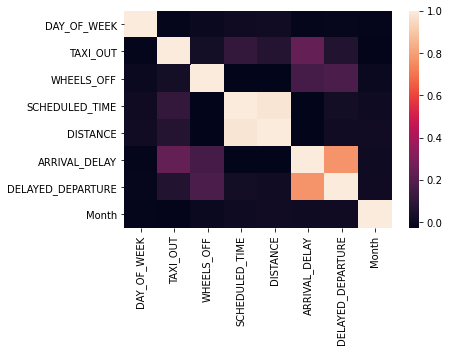

In [5]:
corr = flights_train.corr()
sns.heatmap(corr)

In [7]:
new_data['DATE'] = pd.to_datetime(df[['YEAR','MONTH', 'DAY']])

NameError: name 'df' is not defined

In [10]:
def format_time(column):
    if pd.isnull(column):
        return np.nan
    else:
        if column == 2400: column = 0
        column = "{0:04d}".format(int(column))
        time = datetime.time(int(column[0:2]), int(column[2:4]))
        return time


def combine_date_time(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])

    
# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(dataframe, col):    
    list_time = []
    for index, columns in dataframe[['DATE', col]].iterrows():    
        if pd.isnull(columns[1]):
            list_time.append(np.nan)
        elif float(columns[1]) == 2400:
            columns[0] += datetime.timedelta(days=1)
            columns[1] = datetime.time(0,0)
            list_time.append(combine_date_time(columns))
        else:
            columns[1] = format_time(columns[1])
            list_time.append(combine_date_time(columns))
    return pd.Series(list_time)

In [11]:
new_data['SCHEDULED_DEPARTURE'] = create_flight_time(new_data, 'SCHEDULED_DEPARTURE')

In [12]:
new_data['DEPARTURE_TIME'] = create_flight_time(new_data, 'DEPARTURE_TIME')

In [13]:
new_data['SCHEDULED_ARRIVAL'] = create_flight_time(new_data, 'SCHEDULED_ARRIVAL')

In [14]:
new_data.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DATE
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,2015-01-01 23:54:00,21.0,15.0,205.0,1448,2015-01-01 04:30:00,-22.0,2015-01-01
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,2015-01-01 00:02:00,12.0,14.0,280.0,2330,2015-01-01 07:50:00,-9.0,2015-01-01
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,2015-01-01 00:18:00,16.0,34.0,286.0,2296,2015-01-01 08:06:00,5.0,2015-01-01
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,2015-01-01 00:15:00,15.0,30.0,285.0,2342,2015-01-01 08:05:00,-9.0,2015-01-01
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,2015-01-01 00:24:00,11.0,35.0,235.0,1448,2015-01-01 03:20:00,-21.0,2015-01-01


In [38]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

# Creation of a dataframe with statitical infos on each airline:
global_stats = new_data['ARRIVAL_DELAY'].groupby(new_data['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
AIRLINE,,,,
VX,-78.0,651.0,28815.0,4.712407
HA,-59.0,1467.0,37635.0,2.402099
F9,-49.0,1101.0,42287.0,18.127108
NK,-59.0,833.0,54239.0,17.582256
AS,-82.0,950.0,82850.0,-1.104695
B6,-76.0,952.0,127305.0,6.968689
MQ,-63.0,1152.0,149746.0,11.815074
US,-87.0,750.0,194223.0,3.706209
UA,-81.0,1294.0,244880.0,7.915853


In [34]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

# Creation of a dataframe with statitical infos on each airline:
global_stats_delay = new_data['DELAYED_DEPARTURE'].groupby(new_data['AIRLINE']).apply(get_stats).unstack()
global_stats_delay = global_stats.sort_values('count')
global_stats_delay

,min,max,count,mean
AIRLINE,,,,
VX,-796.0,577.0,28815.0,9.025091
HA,-819.0,453.0,37635.0,-0.586821
F9,-833.0,604.0,42287.0,16.319696
NK,-806.0,598.0,54239.0,18.653810
AS,-828.0,549.0,82850.0,1.522016
B6,-766.0,591.0,127305.0,11.617541
MQ,-829.0,605.0,149746.0,12.473141
US,-802.0,562.0,194223.0,6.051343
UA,-824.0,601.0,244880.0,15.693940


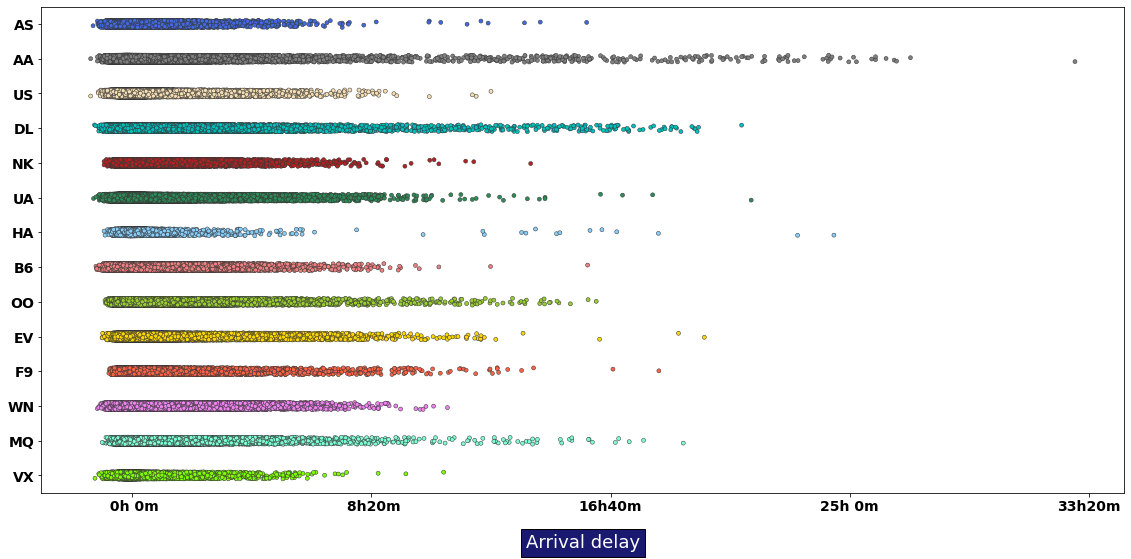

In [27]:
from matplotlib.gridspec import GridSpec

delays = new_data.loc[:, ['AIRLINE', 'ARRIVAL_DELAY']]

colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']

fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)
ax3=fig.add_subplot(gs[1,:]) 



ax3 = sns.stripplot(y="AIRLINE", x="ARRIVAL_DELAY", size = 4, palette = colors,
                    data=delays, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Arrival delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)

plt.tight_layout(w_pad=3) 
plt.savefig('striplot_arival_delay.png')

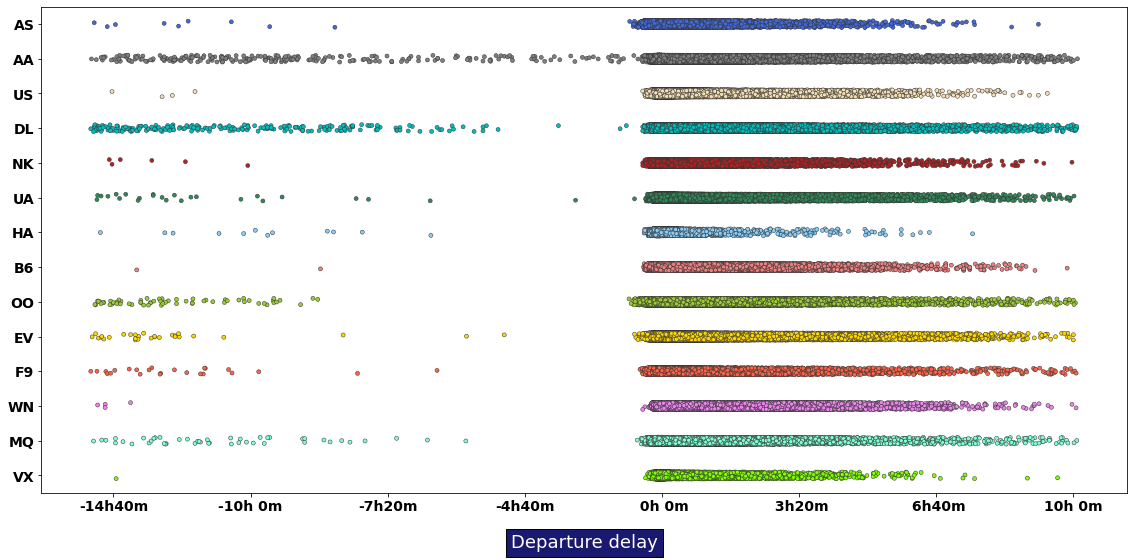

In [28]:
from matplotlib.gridspec import GridSpec

delays = new_data.loc[:, ['AIRLINE', 'DELAYED_DEPARTURE']]

colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']

fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)
ax3=fig.add_subplot(gs[1,:]) 



ax3 = sns.stripplot(y="AIRLINE", x="DELAYED_DEPARTURE", size = 4, palette = colors,
                    data=delays, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)

plt.tight_layout(w_pad=3) 
plt.savefig('striplot_departure_delay.png')

In [16]:
airlines_names = pd.read_csv('airlines.csv')
abbr_companies = airlines_names.set_index('IATA_CODE')['AIRLINE'].to_dict()


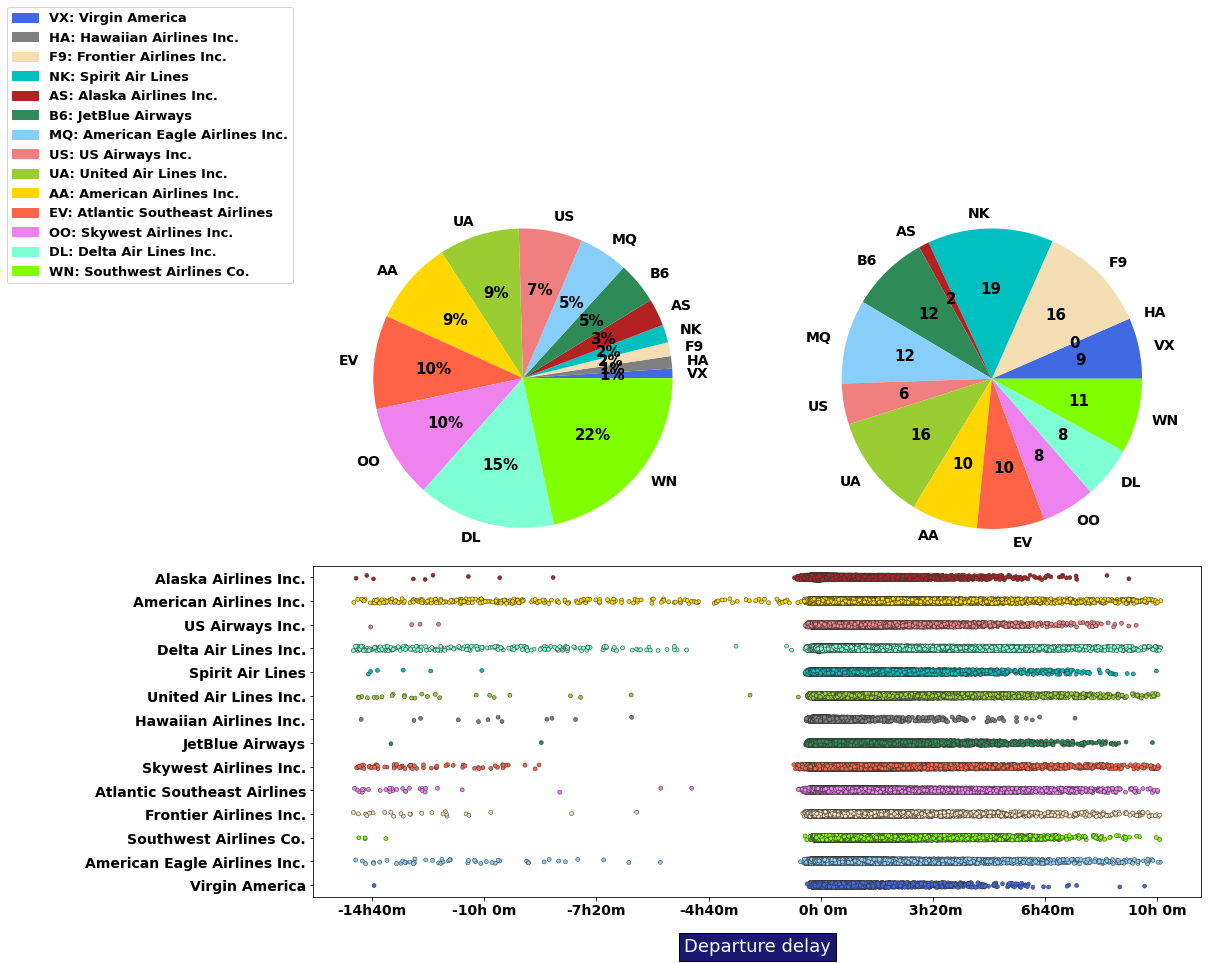

In [37]:
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
#__________________________________________________________________
# I extract a subset of columns and redefine the airlines labeling 
df2 = new_data.loc[:, ['AIRLINE', 'DELAYED_DEPARTURE']]
df2['AIRLINE'] = df2['AIRLINE'].replace(abbr_companies)
#________________________________________________________________________
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
#___________________________________
fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 
#------------------------------
# Pie chart nº1: nb of flights
#------------------------------
labels = [s for s in  global_stats_delay.index]
sizes  = global_stats_delay['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
#ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
#              color = 'w',fontsize=18)
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats_delay.index[i] + ': ' + abbr_companies[global_stats_delay.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)
#----------------------------------------
# Pie chart nº2: mean delay at departure
#----------------------------------------
sizes  = global_stats_delay['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
#ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
#              color='w', fontsize=18)

colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
#___________________________________________________________________
ax3 = sns.stripplot(y="AIRLINE", x="DELAYED_DEPARTURE", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3) 
plt.savefig('departure_delay.png')

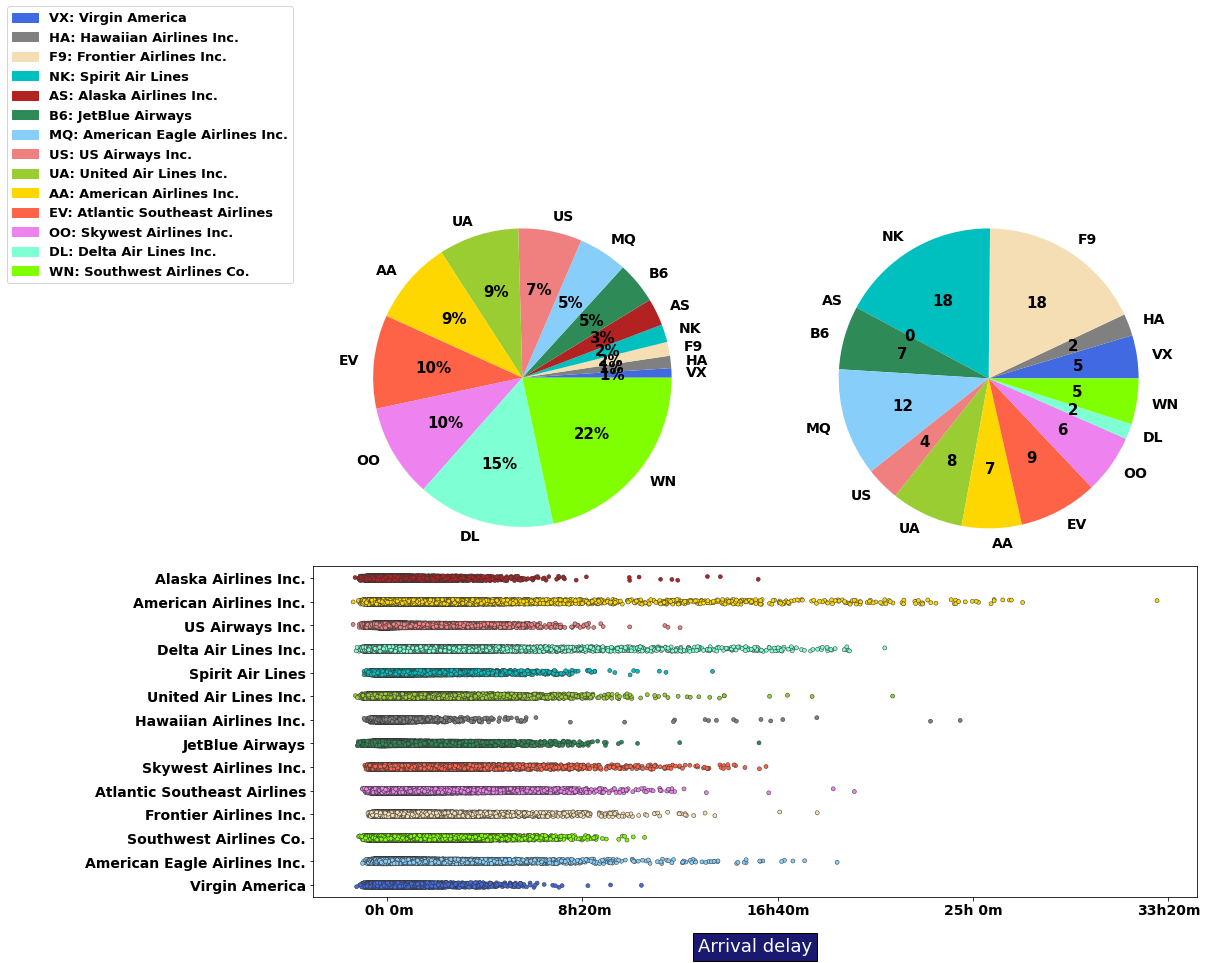

In [39]:
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
#__________________________________________________________________
# I extract a subset of columns and redefine the airlines labeling 
df2 = new_data.loc[:, ['AIRLINE', 'ARRIVAL_DELAY']]
df2['AIRLINE'] = df2['AIRLINE'].replace(abbr_companies)
#________________________________________________________________________
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
#___________________________________
fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 
#------------------------------
# Pie chart nº1: nb of flights
#------------------------------
labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
#ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
#              color = 'w',fontsize=18)
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats.index[i] + ': ' + abbr_companies[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)
#----------------------------------------
# Pie chart nº2: mean delay at departure
#----------------------------------------
sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
#ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
#              color='w', fontsize=18)

colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
#___________________________________________________________________
ax3 = sns.stripplot(y="AIRLINE", x="ARRIVAL_DELAY", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Arrival delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3) 
plt.savefig('arival_delay.png')

In [17]:
airlines_names = pd.read_csv('airlines.csv')
airlines_names
abbr_companies = airlines_names.set_index('IATA_CODE')['AIRLINE'].to_dict()


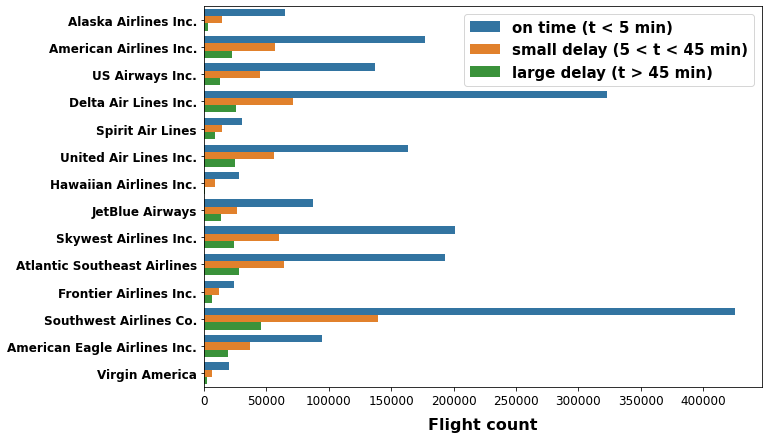

In [41]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
new_data['DELAY_LEVEL'] = new_data['ARRIVAL_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=new_data)

# Replace the abbreviations with the full names of the companies and set the labels
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)

# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')

plt.savefig('delay_level_arrival.png')

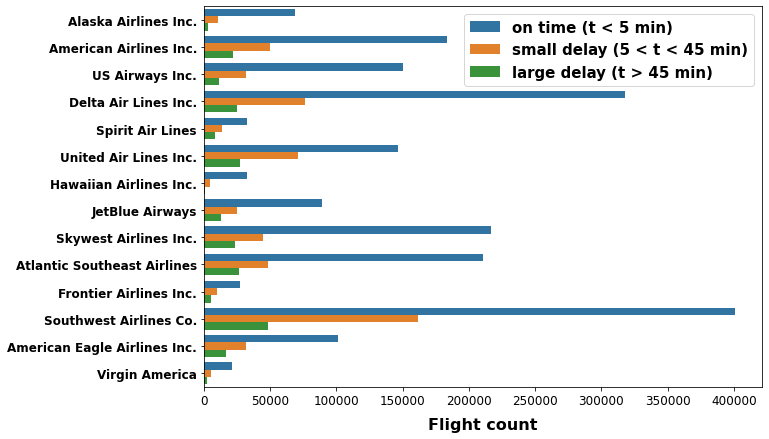

In [42]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
new_data['DELAY_LEVEL'] = new_data['DELAYED_DEPARTURE'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=new_data)

# Replace the abbreviations with the full names of the companies and set the labels
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)

# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.savefig('delay_level_departure.png')